In [16]:
import numpy as np
import matplotlib.pyplot as plt

### We are working with equation y^ = wx+b

In [17]:
# y_hat = w*x + b
x = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]])
y = np.array([460, 232, 178])


In [18]:
#a function which takes an array of x and y to calculate the cost value for each of it the add it like errors

def cost_function(x,y,w,b):
    m = len(x)
    cost = 0
    for i in range(m):

        y_hat = np.dot(w,x[i]) + b

        cost += (y[i] - y_hat)**2                                    #COST FUNCTION
    return cost/(2*m)

### now we want the value of w and b (parameters) be such that the cost function is minimized. for this we use gradient descent

In [19]:
def calculate_gradient(x,y,w,b):
    # differentiate with respect to all the parameters
    m = len(x)
    dw = np.zeros_like(w)
    db = 0

    for i in range(m):
        dw += ((np.dot(x[i],w)+b) - y[i]) * x[i]
        db += (np.dot(x[i],w)+b) - y[i]
        
    return dw/m,db/m

In [20]:

def gradient_descent(learning_rate, x, y, w, b, cost_function, calculate_gradient, num_iterations=1000):
    J_history = []
    p_history = []
    iter = []

    for i in range(num_iterations):
        dw, db = calculate_gradient(x, y, w, b)
        w -= learning_rate * dw
        b -= learning_rate * db

        J_history.append(cost_function(x, y, w, b))
        p_history.append([w.copy(), b])
        iter.append([i + 1, cost_function(x, y, w, b)])

    return w, b, J_history, p_history, iter

In [21]:
b = 785.1811367994083
w = np.array([ 0.39133535, 18.75376741, -53.36032453, -26.42131618])
print(cost_function(x,y,w,b))
a = 5.0e-7  # Learning rate
# Perform gradient descent
w, b, J_history, p_history,iter = gradient_descent(a, x, y, w, b, cost_function, calculate_gradient)

print(w,"\n",b,"\n\n",J_history,"\n",p_history, "\n", iter)

1.5578904045996674e-12
[  0.39133535  18.75376741 -53.36032453 -26.42131618] 
 785.1811367994089 

 [5.879997784875883e-14, 2.5346225355669284e-15, 4.227894028174959e-16, 3.4349788192122e-16, 3.404930499762517e-16, 3.4035094967649226e-16, 3.403163372795746e-16, 3.402862601136228e-16, 3.4025438980751104e-16, 3.402233035070613e-16, 3.401948419433222e-16, 3.401614321636176e-16, 3.401325651607478e-16, 3.401032913616542e-16, 3.4007313743161823e-16, 3.4004058080255084e-16, 3.4001124557452616e-16, 3.3997933317052193e-16, 3.3995037433337123e-16, 3.3991754941559617e-16, 3.398877120501656e-16, 3.39857567675789e-16, 3.3982468186330367e-16, 3.397957949973286e-16, 3.3976477371025926e-16, 3.3973443573253697e-16, 3.3970429815655103e-16, 3.396745696730768e-16, 3.3964392751260897e-16, 3.3961193283429145e-16, 3.395818007039112e-16, 3.3955343136434804e-16, 3.395242479325822e-16, 3.394925016303224e-16, 3.394629472877541e-16, 3.3943407583663445e-16, 3.394048321434685e-16, 3.3937552431580163e-16, 3.39345875

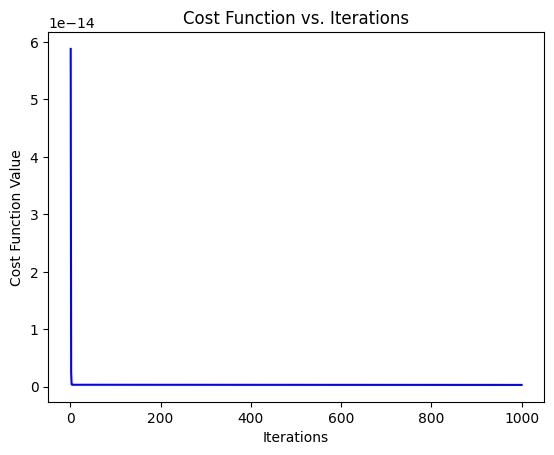

In [22]:
iterations = [i[0] for i in iter]
cost_values = [i[1] for i in iter]

# Plot cost function vs. iterations
plt.plot(iterations, cost_values, 'b-')
plt.xlabel('Iterations')
plt.ylabel('Cost Function Value')
plt.title('Cost Function vs. Iterations')
plt.show()

## REVISIT THE ONE BELOW

Iteration    0: Cost  2529.46
Iteration  100: Cost   695.99
Iteration  200: Cost   694.92
Iteration  300: Cost   693.86
Iteration  400: Cost   692.81
Iteration  500: Cost   691.77
Iteration  600: Cost   690.73
Iteration  700: Cost   689.71
Iteration  800: Cost   688.70
Iteration  900: Cost   687.69
b,w found by gradient descent: -0.00,[ 0.20396569  0.00374919 -0.0112487  -0.0658614 ]
Prediction: 426.19, Target: 460
Prediction: 286.17, Target: 232
Prediction: 171.47, Target: 178


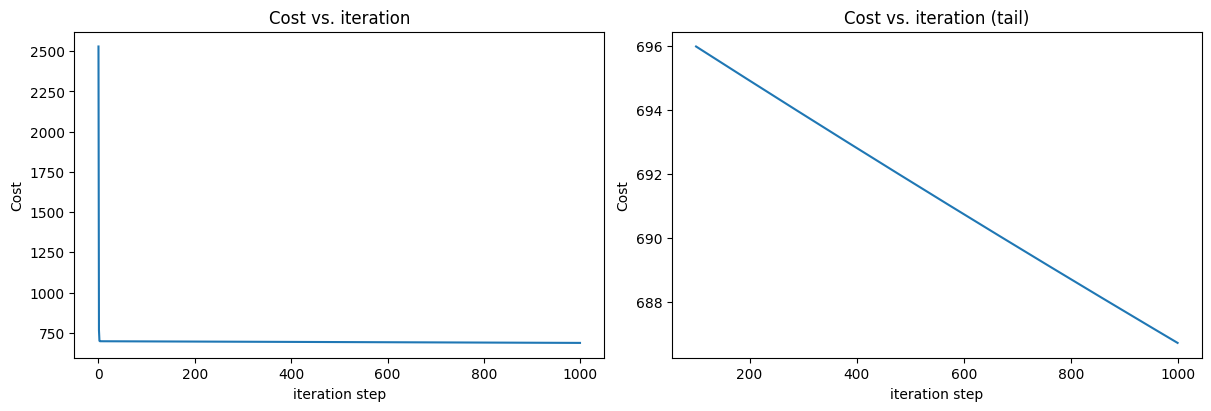

In [23]:
import copy, math
import numpy as np
import matplotlib.pyplot as plt

# Data for training
X_train = np.array([[2104, 5, 1, 45], [1416, 3, 2, 40], [852, 2, 1, 35]])
y_train = np.array([460, 232, 178])

# Initial parameters
b_init = 785.1811367994083
w_init = np.array([ 0.39133535, 18.75376741, -53.36032453, -26.42131618])

# Function to predict using linear regression
def predict(x, w, b):
    return np.dot(x, w) + b

# Function to compute cost
def compute_cost(X, y, w, b):
    m = X.shape[0]
    cost = 0.0
    for i in range(m):
        f_wb_i = np.dot(X[i], w) + b
        cost += (f_wb_i - y[i]) ** 2
    cost /= (2 * m)
    return cost

# Function to compute gradient
def compute_gradient(X, y, w, b):
    m, n = X.shape
    dj_dw = np.zeros((n,))
    dj_db = 0.0
    for i in range(m):
        err = (np.dot(X[i], w) + b) - y[i]
        for j in range(n):
            dj_dw[j] += err * X[i, j]
        dj_db += err
    dj_dw /= m
    dj_db /= m
    return dj_dw, dj_db

# Function for gradient descent
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):
    J_history = []
    w = copy.deepcopy(w_in)
    b = b_in
    for i in range(num_iters):
        dj_dw, dj_db = gradient_function(X, y, w, b)
        w -= alpha * dj_dw
        b -= alpha * dj_db
        cost = cost_function(X, y, w, b)
        J_history.append(cost)
        if i % math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {cost:8.2f}")
    return w, b, J_history

# Initialize parameters for gradient descent
initial_w = np.zeros_like(w_init)
initial_b = 0.0
iterations = 1000
alpha = 5.0e-7

# Run gradient descent
w_final, b_final, J_hist = gradient_descent(X_train, y_train, initial_w, initial_b,
                                            compute_cost, compute_gradient, alpha, iterations)

# Print final parameters and predictions
print(f"b,w found by gradient descent: {b_final:.2f},{w_final}")
for i in range(len(X_train)):
    prediction = predict(X_train[i], w_final, b_final)
    print(f"Prediction: {prediction:.2f}, Target: {y_train[i]}")

# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist)
ax2.plot(100 + np.arange(len(J_hist[100:])), J_hist[100:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step') 
plt.show()